По правилам задания использовать можно только Деревья Принятия Решения (sklearn.tree.DecisionTreeClassifier)

Создавать фичи (признаки машинного обучения) другими моделями машинного обучения (кроме Деревьев Принятия Решения) - запрещено

Метрика F1

Данные представляют собой описание клиентов банка. Каждый клиент описывается рядом признаков, характеризующими его соц-дем, и списком банковских продуктов, которые клиент использует. Индикаторы использования банковских продуктов начинаются с префикса "use_"
Задача: предсказать use_direct_debit - будет ли человек использовать кредитные продукты.

## 1. Загружаем библиотеки

In [193]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (25,15)

##  2. Загружаем данные

In [72]:
df_train = pd.read_csv('hw3_train.csv')
df_test = pd.read_csv('hw3_test_data.csv')

In [123]:
df_train.shape, df_test.shape

((7500, 30), (7500, 29))

In [73]:
df_train.head(10).T

,0,1,2,3,4,5,6,7,8,9
customer_id,107620.00,107775.00,112208.00,112270.00,112332.00,112456.00,112518.00,112580.00,112673.00,112146.00
customer_residence_code,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
gender,2.00,2.00,0.00,0.00,0.00,0.00,2.00,0.00,2.00,0.00
age,47.00,52.00,24.00,26.00,26.00,24.00,23.00,26.00,23.00,23.00
is_new_customer,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
seniority_month,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00
customer_type,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
customer_relation_type,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00
residence_same_as_bank,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
country_same_as_bank,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00


In [74]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 29 columns):
customer_id                7500 non-null int64
customer_residence_code    7500 non-null int64
gender                     7500 non-null int64
age                        7500 non-null int64
is_new_customer            7500 non-null float64
seniority_month            7500 non-null int64
customer_type              7500 non-null float64
customer_relation_type     7500 non-null int64
residence_same_as_bank     7500 non-null int64
country_same_as_bank       7500 non-null int64
join_channel               7500 non-null int64
adress_type                7500 non-null float64
activity_index             7500 non-null float64
household_income           7500 non-null float64
segment                    7500 non-null int64
use_savings                7500 non-null int64
use_guarantees             7500 non-null int64
use_current_accounts       7500 non-null int64
use_derivada_account       7500 non-n

## 3. Анализ и подготовка данных 

Объединим тестовую и тренировочную выборки для подготовки данных:

In [75]:
df_train['sample'] = 'train'
df_test['sample'] = 'test'
df = pd.concat([df_train, df_test], axis=0, ignore_index=True, sort=False)

In [76]:
df.shape

(15000, 30)

Посмотрим на взаимосвязь (корреляцию) наших данных между собой (построим heatmap):

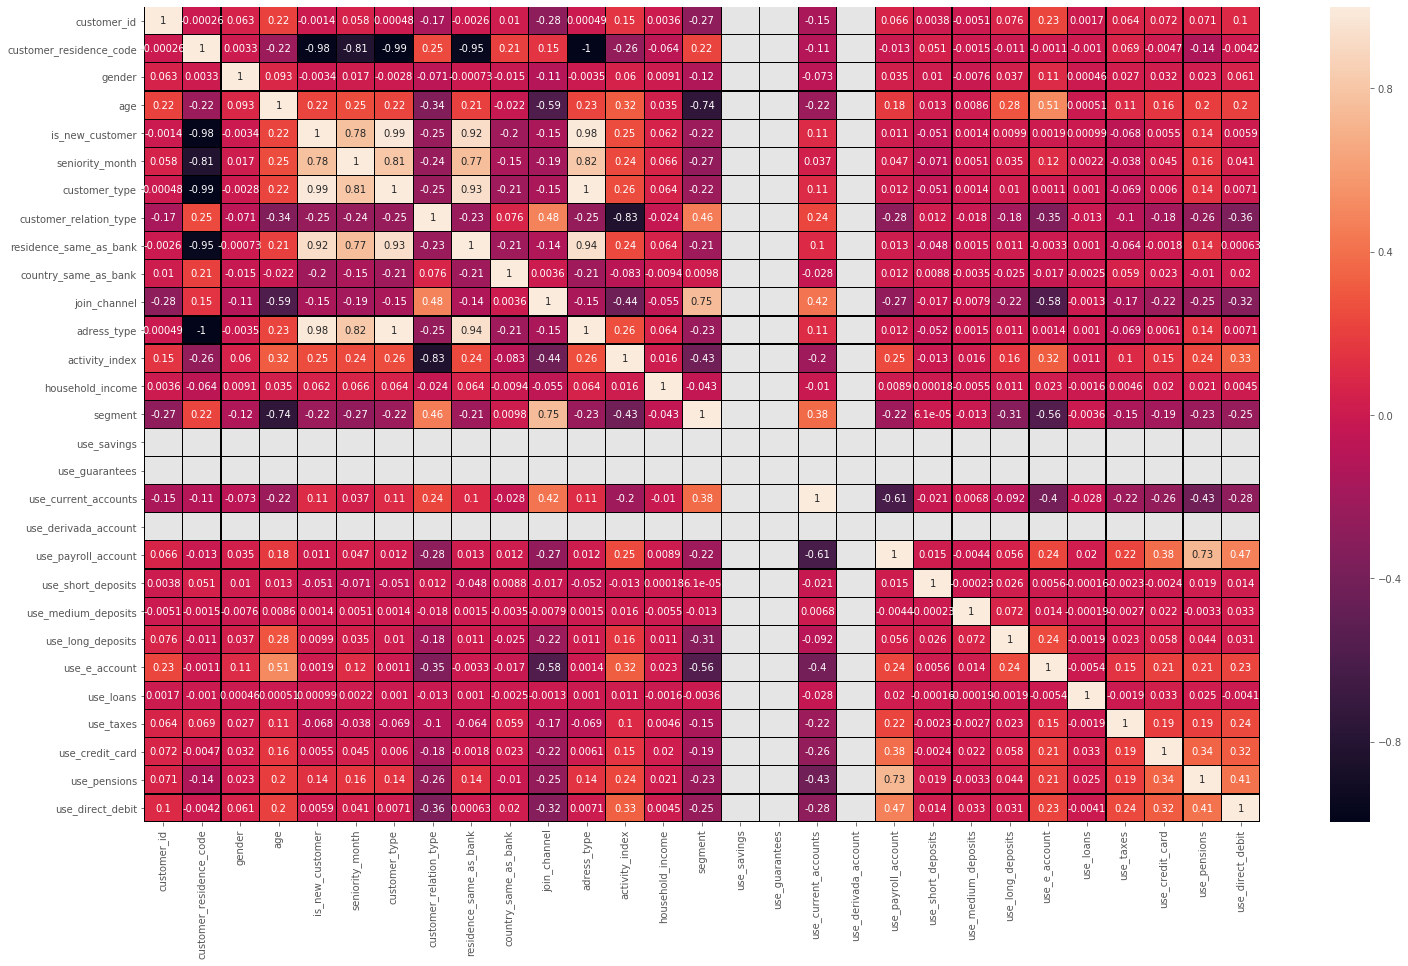

In [77]:
sns.heatmap(df.corr(), annot=True, linewidths=0.2, linecolor='black');

    1. Из карты видно, что данные 'use_savings', 'use_guarantees', 'use_derivada_account' не несут никакой 
    информации, поэтому просто удалим их.
    2. Есть данные, сильно коррелирующие между собой. Так как мы сейчас рассматриваем алгорит дерева 
    принятия решений - можно их особо не трогать. Но с другой стороны - чем меньше информативных данных, 
    тем модель работает быстрее, нет замусоренности

In [78]:
df = df.drop(['use_savings', 'use_guarantees', 'use_derivada_account'], axis = 1)

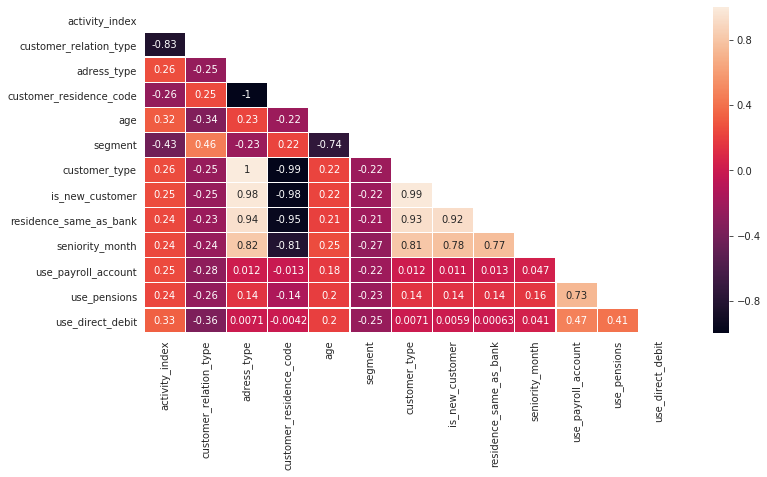

In [79]:
corr = df[['activity_index', 'customer_relation_type','adress_type', 'customer_residence_code', 'age', 'segment', 
           'customer_type', 'is_new_customer', 'residence_same_as_bank', 'seniority_month',
           'use_payroll_account', 'use_pensions', 'use_direct_debit']].corr()

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    
    f, ax = plt.subplots(figsize=(12, 6))
    ax = sns.heatmap(corr, vmax=1, mask=mask, annot=True, linewidths=0.2, linecolor='white')

#sns.heatmap(, 
 #           annot=True)
#plt.rcParams['figure.figsize'] = (10, 5)

Из полученной карты корреляции хорошо видно, что признаки 'adress_type', 'customer_residence_code', 'customer_type' сильно коррелируют с 'is_new_customer', 'residence_same_as_bank', 'seniority_month', а на целевую переменную не оказывают практически никакого влияния. Поэтому также можно избавиться от них.

In [ ]:
df = df.drop([ 'customer_id', 'adress_type', 'customer_residence_code' , 'customer_type'], axis = 1)

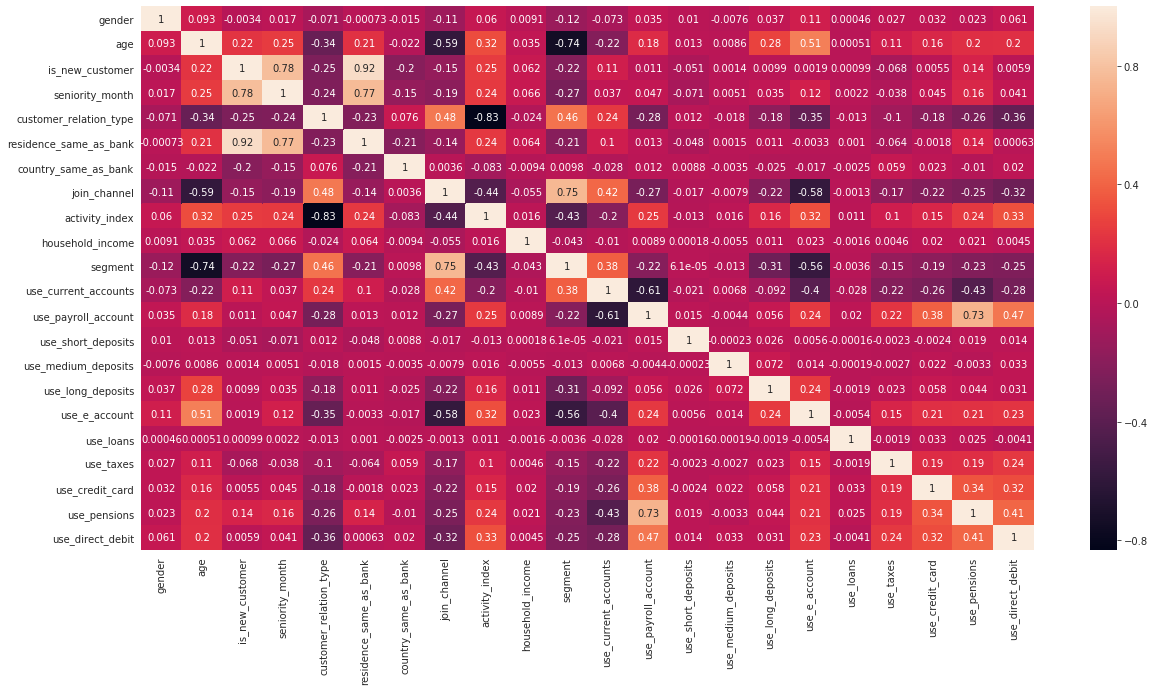

In [97]:
with sns.axes_style("white"):
    
    f, ax = plt.subplots(figsize=(20, 10))
    ax = sns.heatmap(df.corr(), vmax=1, annot=True)

Посмотрим на уникальные значения в наших столбцах:

In [104]:
for c in df.columns:
    z = set(df[c])
    if len(z) < 20:
        print(c, '\n',df[c].value_counts(), '\n')
    else:
        print(c, '\n',  len(set(z)), '\n')

gender 
 0    7735
2    7145
1     120
Name: gender, dtype: int64 

age 
 94 

is_new_customer 
  0.0    14876
-1.0      120
 1.0        4
Name: is_new_customer, dtype: int64 

seniority_month 
 39 

customer_relation_type 
 1    8149
0    6730
2     120
3       1
Name: customer_relation_type, dtype: int64 

residence_same_as_bank 
 2    14876
1      120
0        4
Name: residence_same_as_bank, dtype: int64 

country_same_as_bank 
 0    14295
2      585
1      120
Name: country_same_as_bank, dtype: int64 

join_channel 
 10    9638
6     3306
1     1057
5      396
9      347
13     122
8       55
2       53
4        9
11       8
14       4
12       2
7        1
3        1
0        1
Name: join_channel, dtype: int64 

activity_index 
  0.0    7446
 1.0    7434
-1.0     120
Name: activity_index, dtype: int64 

household_income 
 12038 

segment 
 2    10031
1     4538
0      309
3      122
Name: segment, dtype: int64 

use_current_accounts 
 1    12768
0     2232
Name: use_current_accoun

Бросается в глаза, что переменная 'gender' может принимать 3 значения. Посмотрим на данные, где 'gender' = 1.
Их всего 120, почти во всех остальных столбцах есть значения, которых так же 120 и они отличаются от остальных

In [96]:
df.query('gender==1').head(20).T

,111,129,259,281,417,430,450,654,667,938,1003,1021,1396,1439,1529,1699,1761,1879,1922,2025
gender,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
age,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
is_new_customer,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
seniority_month,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
customer_relation_type,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
residence_same_as_bank,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
country_same_as_bank,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
join_channel,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
activity_index,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
household_income,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


По всей вероятности тут ошибка в заполнении анкетных данных. С одной стороны - деревья могут "отсечь" эти данные и решение всё равно будет хорошим. С другой стороны - можно заменить часть данных:
    1. Возраст, 'household_income' и 'seniority_month' заменим на медианное значение;
    2. Пол ни с чем не коррелирует, поэтому заполним его через random.randint(0, 2);
    3. В параметре use_pensions заменим '-1' на '1', тк так присутствуют нули и вероятно '-1' означает 1, 
    по аналогии с остальными данными в этом столбце;
    4. Также через random заменим 'activity_index' и 'is_new_customer';    

In [116]:
def prepare_data(df_input):
    df_output = df_input.copy()
    
    for i in ['age', 'household_income', 'seniority_month']:
        df_output[i] = df_output[i].map(lambda x: int(df_output[i].median()) if x == -1 else x)
    
    for i in ['activity_index', 'is_new_customer']:
        df_output[i] = df_output[i].map(lambda x: random.randint(0, 1) if x == -1 else x)
    
    df_output['gender'] = df_output['gender'].map(lambda x: random.choice([0, 2]) if x == 1 else x)
    df_output['use_pensions'] = df_output['use_pensions'].map(lambda x: 1 if x == -1 else x)
    
    return df_output
    

Обработаем исходные данные и разделим их обратно на тренировочную и тестовую выборки:

In [130]:
df_new = prepare_data(df)

In [131]:
df_train_new = df_new[df_new['sample']=='train'].drop('sample', axis=1)
df_test_new = df_new[df_new['sample']=='test'].drop(['sample', 'use_direct_debit'] , axis=1)

In [132]:
df_train_new.shape, df_test_new.shape

((7500, 22), (7500, 21))

## 4. Подготовка тренировочной выборки

In [134]:
target = df_train_new['use_direct_debit']

In [136]:
df_train_new = df_train_new.drop('use_direct_debit', axis=1)

Отделим 20% данных для "теста" итоговой модели. 

In [139]:
X_train, X_test, y_train, y_test = train_test_split(df_train_new, target, test_size=0.2, random_state=9)

In [140]:
target.value_counts()

0.0    6663
1.0     837
Name: use_direct_debit, dtype: int64

Будем использовать кросс-валидацию (перекрестную проверку) для подбора модели, а так как выборка неравномерная - есть смысл использовать 'стратифицированные холды'(StratifiedKFold)  - соотношение классов в каждом холде будет сохранено.

## 5. Построение модели 

Как было сказано выше - будем строить предсказание с помощью дерева принятия решений. Подбор гиперпараметров модели будем проводить самостоятельно (без использования pipeline или grid-функций - тоже по заданию).

Рассмотрим основные гиперпараметры дерева:
    1. criterion - алгоритм оценки снижения неопределенности в данных, может принимать значения 'gini' или 
    'entropy';
    2. max_depth – максимальная глубина дерева;
    3. max_features — максимальное число признаков, по которым определяется лучшее разбиение в дереве; 
    4. min_samples_leaf – минимальное число объектов в листе; 
    5. min_samples_split - минимальное количество объектов для дальнейшего разбиения узла;
    6. min_impurity_split - порог для ранней остановки роста дерева;
    7. presort - предварительная сортировка данных для ускорения поиска наилучшего разбиения при подборе;
    8. random_state - 'заморозка' случайной выборки.

Нам нужна отправная точка - построим модель "из коробки" и посмотрим на значение нашей метрики.

In [158]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
pred_1 = tree_model.predict(X_test)
print('f1_score - ', f1_score(y_test, pred_1))

f1_score -  0.47323943661971835


Отлично, теперь нужно улучшить нашу модель. Так как подбор гиперпараметров будем проводить вручную - для начала ограничимся criterion, max_depth и  min_samples_leaf.

In [163]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=36)
scoring = 'f1'

In [171]:
for algoritm in ['gini', 'entropy']:
    for depth in range(2, 15):
        for leaf in range(1, 20, 2): 
            tree = DecisionTreeClassifier(criterion=algoritm, max_depth = depth, min_samples_leaf = leaf, \
                                      random_state = 21, presort = True)               
            z = cross_val_score(tree, X_train, y_train, scoring=scoring, cv=cv)
            if z.mean() > 0.5:
                print('------'*10, '\n', 'f1 -', z.mean(), '\n', 'Критерий -', algoritm, '\n', \
                      'Глубина -', depth, '\n', 'Размер листа -', leaf, '\n')


------------------------------------------------------------ 
 f1 - 0.5092886044854084 
 Критерий - gini 
 Глубина - 5 
 Размер листа - 1 

------------------------------------------------------------ 
 f1 - 0.5081610026392637 
 Критерий - gini 
 Глубина - 5 
 Размер листа - 3 

------------------------------------------------------------ 
 f1 - 0.507871479701204 
 Критерий - gini 
 Глубина - 5 
 Размер листа - 5 

------------------------------------------------------------ 
 f1 - 0.5006262881937581 
 Критерий - entropy 
 Глубина - 13 
 Размер листа - 15 



Лучшее значение - 0.50929. Обучим модель с данными параметрами (criterion= 'gini', max_depth = 5, min_samples_leaf =  1) и посмотрим значение на отложенной выборке:

In [174]:
final_tree = DecisionTreeClassifier(criterion='gini', max_depth = 5, min_samples_leaf = 1, \
                                    random_state = 21, presort = True)

In [176]:
final_tree.fit(X_train, y_train)
prediction = final_tree.predict(X_test)
print('f1_score - ', f1_score(y_test, prediction))

f1_score -  0.5666666666666667


На отложенной выборке получили значение метрики выше, чем при подборе модели - приятный результат. Напоследок - посмотрим значимость признаков:

In [187]:
scores = final_tree.feature_importances_ 
for score, name in zip(scores, X_train.columns):
    if score != 0:
        print(" {:.4f} : {}".format(score, name))

 0.1211 : age
 0.0010 : is_new_customer
 0.0111 : seniority_month
 0.1507 : customer_relation_type
 0.0015 : country_same_as_bank
 0.0018 : join_channel
 0.0126 : activity_index
 0.0201 : household_income
 0.0074 : use_current_accounts
 0.6119 : use_payroll_account
 0.0228 : use_taxes
 0.0094 : use_credit_card
 0.0285 : use_pensions
